### Modelo de centrifugación

Del planteamiento original del modelo de sedimentación de una partícula esférica inmersa en un fluido, tomando en cuenta el peso, la fuerza boyeante y la debida a la viscosidad del fluido se concluyó que la *tasa de sedimentación* está dada por:


$$\frac{dx}{dt}= \frac{d_p^2 \, (\rho_l-\rho_p)\, g}{18\, \nu}$$

Para el caso de una centrifuga, donde la fuerza g que influye sobre la partícula es aumentada artificialmente haciendo girar el contenedor de la particula sobre un eje la ecuación anterior se modifica como:

$$\frac{dx}{dt}= \frac{d_p^2 \, (\rho_l-\rho_p)\, \omega^2\, r}{18\, \nu}$$

Dónde $\omega$ es la velocidad angular de la centrifuga y $r$ es la distancia que hay entre la partícula y el eje de giro.

Lo anterior nos indica una ecuación deferencial ordinaria, donde aunque la parte derecha no tiene dependencia del tiempo, si lo tiene de $x$ que en nuestro caso es $r$, es decir, la distancia recorrida por la partícula. $r$ no es constante debido a que la partícula se encuentra en movimiento constante debido a la fuerza de giro y por lo tanto su distancia respecto al eje no permanece constante.

De esta manera, queda resolver la ecuación diferencial resultante:

$$\int^{r_f}_{r_0} \frac{dr}{r}= \int^{t_f}_{t_0} \frac{d_p^2 \, (\rho_l-\rho_p)\, \omega^2}{18\, \nu} dt$$

$$\implies \ln\left({\frac{r_f}{r_0}}\right) = \frac{d_p^2 \, (\rho_l-\rho_p)\, \omega^2}{18\, \nu} (t-t_0)$$

Ahora tomaremos en cuenta unas condiciones dentro del modelo para poderlo acoplar a nuestro experimento.

Primero que nada asumieremos que el tiempo $t_0$ contamos con el coloide polidisperso y sin ningun tipo de sedimentación previa, con lo que en $t_0 = 0$ en cualquier sección del tubo se pueden encontrar particulas de cualquier tamaño que se encuentre dentro de nuestro coloide

Los radios a tomar en cuenta depende tanto de la centrifugadora como de los *tubos eppendorf* utilizados. 

De acuerdo al manual de la centrifuga, el radio del brazo ($r_0$) es de $8.49\, cm$

El radio final variara de acuerdo a la muestra que se quiera obtener, como se muestra en la siguiente imagen.


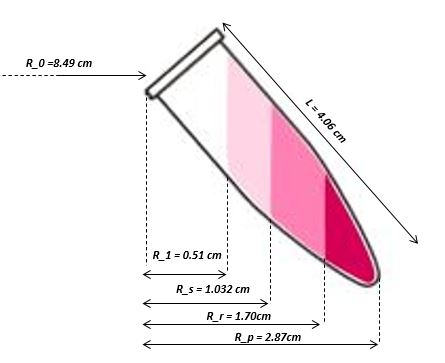

Un par de aobservaciones respecto a los radios son:

1. Al tratarse de una centrifuga de angulo fijo, los radios no son equivalentes solamente a los del tubo, sino que varian de acuerdo a la inclinación de la centrifuga, en nuestro caso $45°$ y los radios efectivos son los que se muestran en la imagen

2. El radio final no consite solamente en el radio mostrado, sino en la suma de éste y el radio inicial

3. Se tomarán en cuenta *secciones* dentro de la simulación de manera que para radios menores que $R_0+R_s$ todas las particulas en ese régimen serán consideradas sobrenadante, para el caso del pellet se tomaran en cuenta aquellas que hayan avanzado hasta $R_0+R_P$

#### Analisis dimensional

Para finalizar esta parte se hará un analisis dimensional de las variables para saber que introducir en nuestro porgrama y que esperar de él:




Como ejercicio inicial se propone obtener el tiempo que recorrera una particula de diametro conocido en recorrer desde la parte inicial del tubo $R_1$ hasta llegar al pellet $R_r$ con lo que el modelo queda como

$$t = \frac{18 \ln\left(\frac{R_r}{R_1}\right)}{d_p^2(\rho_l-\rho_p)\omega^2} = \left[ \frac{\frac{Kg}{m\, s}}{m^2\, \frac{Kg}{m^3}RPM^2}\right]= \left[\frac{\frac{1}{s}}{\left[\frac{Vueltas}{m}\right]^2}\right]$$


Para que las unidades concuerden se observa que el diametro de las particulas se presentará en metros,mientras que la velocidad angular tendra que mostrase como $\frac{Revs}{s}$

$\begin{cases}
\nu = \frac{Kg}{m\, s}\\
\rho_l = \frac{Kg}{m^3}\\
\rho_p = \frac{Kg}{m^3}\\
d_p = m\\
\omega = \frac{Revs}{s}\\
r_f,r_i = cm \, (indistintamente)\\
t = seg
\end{cases}$

Aplicando estas unidades, se puede manipular la ecuación en función de lo que se desee obtener y no pierde generalidad

### Simulaciones

Para este primer porgrama, se obtiene la posición de una particula en el tubo de la centrifuga en función de su tamaño, con la mejor condición de centrifugacion (500 g) a 3 tiempos distintos.

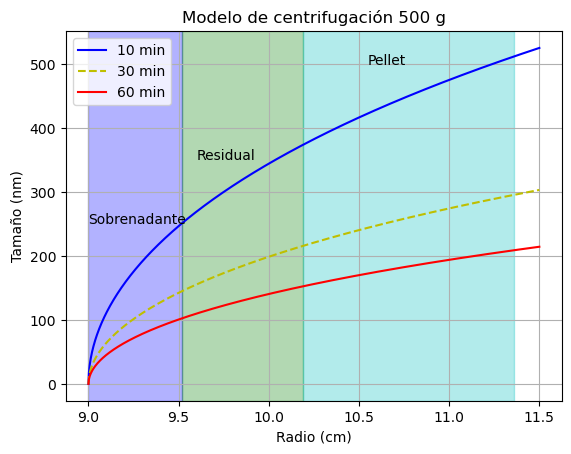

In [40]:
import numpy as np
import matplotlib.pyplot as plt


"""Dfinimos las variables que ocupará nuestro programa"""
rho_p = 19300       #Densidad de la partícula (kg/m^3)
rho_m = 997       #Densidad del medio  (kg/m^3)
nu = 1.002e-3         #Viscosidad del fluido/agua (kg/m s)
r_0 = 9.0           #Radio inicial  (cm)
t1 = 600
t = 1800            #Tiempo (seg)
t2=3600
omega = 2290/60        #Velocidad angular (revs por seg)


def f(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(x/r_0)*nu)/(t1*(rho_p-rho_m)*omega**2))    
    return dp1/1e-9

def h(x):       #Definimos la funcion de centrifuagación
    dp = np.sqrt((18*np.log(x/r_0)*nu)/(t*(rho_p-rho_m)*omega**2))    
    return dp/1e-9

def g(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu)/(t2*(rho_p-rho_m)*omega**2))    
    return dp2/1e-9


#Limites y puntos
x = np.linspace(9,11.5,1000)
#v = [8,11.8,0,20000]

#Graficar
plt.plot(x,f(x),'b', label = '10 min')
plt.plot(x,h(x), 'y--', label = '30 min')
plt.plot(x,g(x),'r', label = '60 min')



plt.xlabel('Radio (cm)')
plt.ylabel('Tamaño (nm)')
plt.title("Modelo de centrifugación 500 g")
plt.grid()
plt.legend(loc=2)
plt.text(9, 250, 'Sobrenadante')
plt.text(9.6, 350, 'Residual')
plt.text(10.55,500, 'Pellet')
plt.axis()
#plt.axis(v)
plt.axvspan(9.0, 9.52, alpha=0.3, color='b')
plt.axvspan(9.52, 10.19, alpha=0.3, color='g')
plt.axvspan(10.19, 11.36, alpha=0.3, color='c')


Se observa que, como lo marcan los resultado experimentales, entre mayor es el tiempo de centrifugación particulas de menor tamaño comienzan a entrar a la zona de pellet. Aunque la toería no esta acoplada a los resultados experimentales obtenidos, es una buena aproximación y el orden de magnitud es similar.
Por otra parte, dejando el tiempo fijo y variando la velocidad angular.

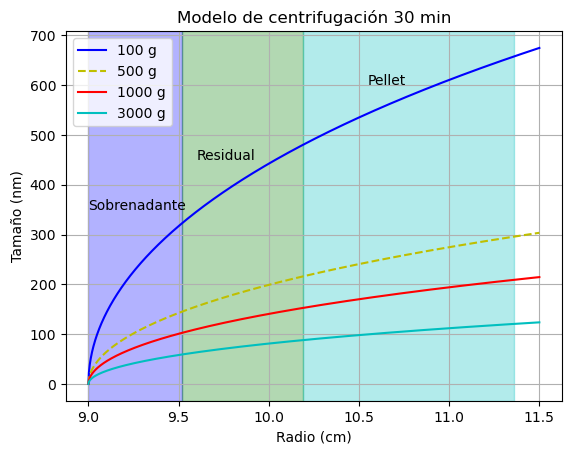

In [42]:
import numpy as np
import matplotlib.pyplot as plt


"""Dfinimos las variables que ocupará nuestro programa"""
rho_p = 19300       #Densidad de la partícula (kg/m^3)
rho_m = 997       #Densidad del medio  (kg/m^3)
nu = 1.002e-3          #Viscosidad del fluido  (kg/m s)
r_0 = 9.0           #Radio inicial  (cm)
t = 1800            #Tiempo (seg)
omega1 = 1030 / 60
omega = 2290/60        #Velocidad angular (revs por seg)
omega2 = 3240/60
omega3 = 5620/60


def f(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(x/r_0)*nu)/(t*(rho_p-rho_m)*omega1**2))    
    return dp1/1e-9

def g(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu)/(t*(rho_p-rho_m)*omega**2))    
    return dp2/1e-9

def h(x):       #Definimos la funcion de centrifuagación
    dp = np.sqrt((18*np.log(x/r_0)*nu)/(t*(rho_p-rho_m)*omega2**2))    
    return dp/1e-9

def j(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu)/(t*(rho_p-rho_m)*omega3**2))    
    return dp2/1e-9


#Limites y puntos
x = np.linspace(9,11.5,1000)
#v = [8,11.8,0,20000]

#Graficar
plt.plot(x,f(x),'b', label = '100 g')
plt.plot(x,g(x), 'y--', label = '500 g')
plt.plot(x,h(x),'r', label = '1000 g')
plt.plot(x,j(x),'c', label = '3000 g')



plt.xlabel('Radio (cm)')
plt.ylabel('Tamaño (nm)')
plt.title("Modelo de centrifugación 30 min")
plt.grid()
plt.legend(loc=2)
plt.text(9, 350, 'Sobrenadante')
plt.text(9.6, 450, 'Residual')
plt.text(10.55, 600, 'Pellet')

plt.axis()
#plt.axis(v)
plt.axvspan(9.0, 9.52, alpha=0.3, color='b')
plt.axvspan(9.52, 10.19, alpha=0.3, color='g')
plt.axvspan(10.19, 11.36, alpha=0.3, color='c')


Se observa que en este caso, para la condición 30 min 500 g la recta es la misma, y al aumentar la fuerza en el mismo tiempo, ocurre  lo mimso que en la grafica pasada, y partículas de menor tamaño comienzan a entrar en la zona de pellet.

Que pasaría si a la que consideramos nuestra mejor condición le variaramos otro parametro, como la densidad y/o viscosidad del agua?

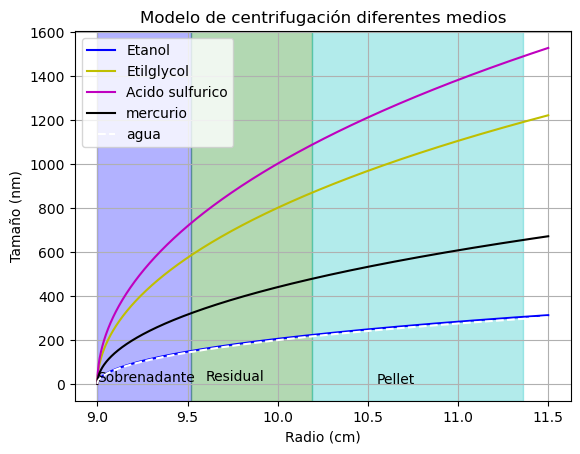

In [2]:
import numpy as np
import matplotlib.pyplot as plt


"""Dfinimos las variables que ocupará nuestro programa"""
rho_p = 19300       #Densidad de la partícula (kg/m^3)
rho_et = 789       #Etanol
rho_peg = 1130           #Polietilglycol
rho_gli = 1260            #Glicerina
rho_ac = 1840           #Acido sulfurico
rho_merc = 13600         #mercurio
rho_m = 997       #Densidad del medio (agua) (kg/m^3)

nu_et = 1.074e-3
nu_peg = 0.0161
nu_gli = 1.5
nu_ac = 0.0242
nu_merc = 1.526e-3
nu = 1.002e-3          #Viscosidad del fluido  (kg/m s)

r_0 = 9.0           #Radio inicial  (cm)
t = 1800            #Tiempo (seg)
omega = 2290/60        #Velocidad angular (revs por seg)


def f(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(x/r_0)*nu_et)/(t*(rho_p-rho_et)*omega**2))    
    return dp1/1e-9

def g(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu_peg)/(t*(rho_p-rho_peg)*omega**2))    
    return dp2/1e-9

def h(x):       #Definimos la funcion de centrifuagación
    dp = np.sqrt((18*np.log(x/r_0)*nu_gli)/(t*(rho_p-rho_gli)*omega**2))    
    return dp/1e-9

def j(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu_ac)/(t*(rho_p-rho_ac)*omega**2))    
    return dp2/1e-9

def k(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu_merc)/(t*(rho_p-rho_merc)*omega**2))    
    return dp2/1e-9

def l(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu)/(t*(rho_p-rho_m)*omega**2))    
    return dp2/1e-9


#Limites y puntos
x = np.linspace(9,11.5,1000)
#v = [8,11.8,0,20000]

#Graficar
plt.plot(x,f(x),'b', label = 'Etanol')
plt.plot(x,g(x), 'y', label = 'Etilglycol')
#plt.plot(x,h(x),'r', label = 'glicerina')
plt.plot(x,j(x),'m', label = 'Acido sulfurico')
plt.plot(x,k(x),'k', label = 'mercurio')
plt.plot(x,l(x),'w--', label = 'agua')



plt.xlabel('Radio (cm)')
plt.ylabel('Tamaño (nm)')
plt.title("Modelo de centrifugación diferentes medios")
plt.grid()
plt.legend(loc=2)
plt.text(9, 10, 'Sobrenadante')
plt.text(9.6, 16, 'Residual')
plt.text(10.55, 2, 'Pellet')

plt.axis()
#plt.axis(v)
plt.axvspan(9.0, 9.52, alpha=0.3, color='b')
plt.axvspan(9.52, 10.19, alpha=0.3, color='g')
plt.axvspan(10.19, 11.36, alpha=0.3, color='c')

De acuerdo a lo anterior, particulas más grandes se quedarían en el sobrenadante debido al aumento en la densidad y/o viscosidad al cambiar el luquido en el que están inmersas las partículas. Eso se puede solucionar aumentando la fuerza g

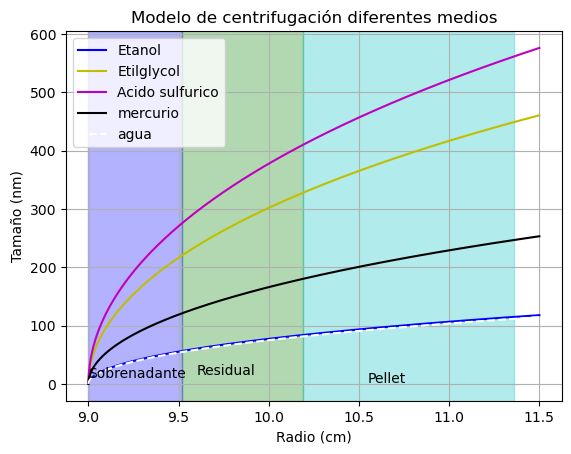

In [62]:
import numpy as np
import matplotlib.pyplot as plt


"""Dfinimos las variables que ocupará nuestro programa"""
rho_p = 19300       #Densidad de la partícula (kg/m^3)
rho_et = 789       #Etanol
rho_peg = 1130           #Polietilglycol
#rho_gli = 1260            #Glicerina
rho_ac = 1840           #Acido sulfurico
rho_merc = 13600         #mercurio
rho_m = 997       #Densidad del medio (agua) (kg/m^3)

nu_et = 1.074e-3
nu_peg = 0.0161
#nu_gli = 1.5
nu_ac = 0.0242
nu_merc = 1.526e-3
nu = 1.002e-3          #Viscosidad del fluido  (kg/m s)

r_0 = 9.0           #Radio inicial  (cm)
t = 1800            #Tiempo (seg)
omega = 6070/60        #Velocidad angular (revs por seg)


def f(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(x/r_0)*nu_et)/(t*(rho_p-rho_et)*omega**2))    
    return dp1/1e-9

def g(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu_peg)/(t*(rho_p-rho_peg)*omega**2))    
    return dp2/1e-9

def h(x):       #Definimos la funcion de centrifuagación
    dp = np.sqrt((18*np.log(x/r_0)*nu_gli)/(t*(rho_p-rho_gli)*omega**2))    
    return dp/1e-9

def j(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu_ac)/(t*(rho_p-rho_ac)*omega**2))    
    return dp2/1e-9

def k(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu_merc)/(t*(rho_p-rho_merc)*omega**2))    
    return dp2/1e-9

def l(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu)/(t*(rho_p-rho_m)*omega**2))    
    return dp2/1e-9


#Limites y puntos
x = np.linspace(9,11.5,1000)
#v = [8,11.8,0,20000]

#Graficar
plt.plot(x,f(x),'b', label = 'Etanol')
plt.plot(x,g(x), 'y', label = 'Etilglycol')
#plt.plot(x,h(x),'r', label = 'glicerina')
plt.plot(x,j(x),'m', label = 'Acido sulfurico')
plt.plot(x,k(x),'k', label = 'mercurio')
plt.plot(x,l(x),'w--', label = 'agua')



plt.xlabel('Radio (cm)')
plt.ylabel('Tamaño (nm)')
plt.title("Modelo de centrifugación diferentes medios")
plt.grid()
plt.legend(loc=2)
plt.text(9, 10, 'Sobrenadante')
plt.text(9.6, 16, 'Residual')
plt.text(10.55, 2, 'Pellet')

plt.axis()
#plt.axis(v)
plt.axvspan(9.0, 9.52, alpha=0.3, color='b')
plt.axvspan(9.52, 10.19, alpha=0.3, color='g')
plt.axvspan(10.19, 11.36, alpha=0.3, color='c')

Tomemos el caso partícular del etiglycol vs el del agua

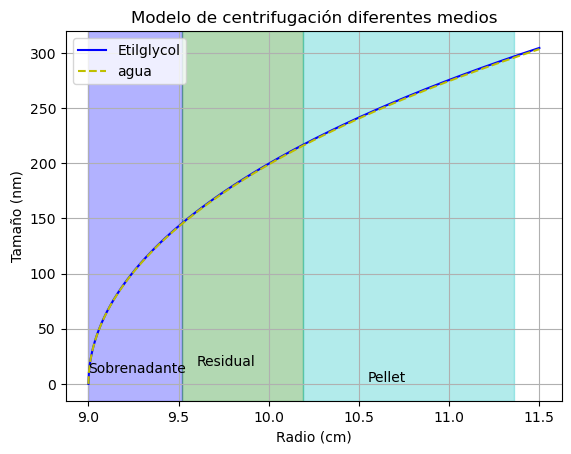

In [68]:
import numpy as np
import matplotlib.pyplot as plt


"""Dfinimos las variables que ocupará nuestro programa"""
rho_p = 19300       #Densidad de la partícula (kg/m^3)
rho_peg = 1130       #Etanol
rho_m = 997       #Densidad del medio (agua) (kg/m^3)

nu_peg = 0.0161
nu = 1.002e-3          #Viscosidad del fluido  (kg/m s)

r_0 = 9.0           #Radio inicial  (cm)
t = 1800            #Tiempo (seg)
omega1 = 9180/60        #Velocidad angular (revs por seg)
omega2 = 2290/60


def f(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(x/r_0)*nu_peg)/(t*(rho_p-rho_peg)*omega1**2))    
    return dp1/1e-9

def g(x):       #Definimos la funcion de centrifuagación
    dp2 = np.sqrt((18*np.log(x/r_0)*nu)/(t*(rho_p-rho_m)*omega2**2))    
    return dp2/1e-9


#Limites y puntos
x = np.linspace(9,11.5,1000)
#v = [8,11.8,0,20000]

#Graficar
plt.plot(x,f(x),'b', label = 'Etilglycol')
plt.plot(x,g(x),'y--', label = 'agua')



plt.xlabel('Radio (cm)')
plt.ylabel('Tamaño (nm)')
plt.title("Modelo de centrifugación diferentes medios")
plt.grid()
plt.legend(loc=2)
plt.text(9, 10, 'Sobrenadante')
plt.text(9.6, 16, 'Residual')
plt.text(10.55, 2, 'Pellet')

plt.axis()
#plt.axis(v)
plt.axvspan(9.0, 9.52, alpha=0.3, color='b')
plt.axvspan(9.52, 10.19, alpha=0.3, color='g')
plt.axvspan(10.19, 11.36, alpha=0.3, color='c')

Para obtener la curva del agua a 30 min 500 g, para el etilglycon a 30 min se necesitan 8000 g

Ahora, cambiando el enfoque modifiquemos el código para estudiar la evolución temporal del tamaño de las particulas inmersas en el pellet

"plt.axvspan(9.0, 9.52, alpha=0.3, color='b')\nplt.axvspan(9.52, 10.19, alpha=0.3, color='g')\nplt.axvspan(10.19, 11.36, alpha=0.3, color='c')"

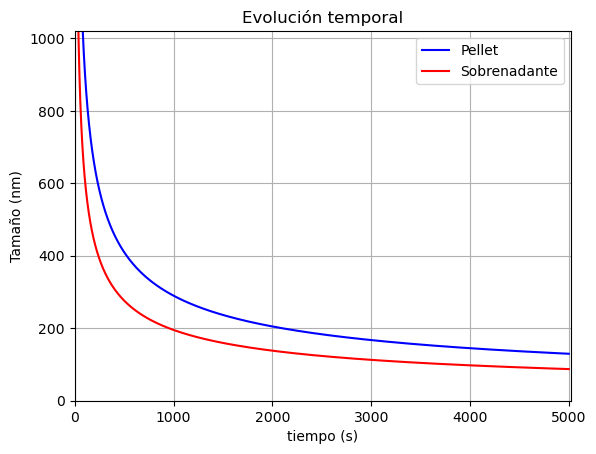

In [92]:
import numpy as np
import matplotlib.pyplot as plt


"""Dfinimos las variables que ocupará nuestro programa"""
rho_p = 19300       #Densidad de la partícula (kg/m^3)
rho_m = 997       #Densidad del medio  (kg/m^3)
nu = 1.002e-3         #Viscosidad del fluido/agua (kg/m s)
r_0 = 9.0           #Radio inicial  (cm)
r_p = 10.19
r_s = 9.522

omega = 2290/60        #Velocidad angular (revs por seg)


def f(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_p/r_0)*nu)/(x*(rho_p-rho_m)*omega**2))    
    return dp1/1e-9
def g(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_s/r_0)*nu)/(x*(rho_p-rho_m)*omega**2))    
    return dp1/1e-9



#Limites y puntos
x = np.linspace(2,5000,10000)
v = [0,5020,0,1020]

#Graficar
plt.plot(x,f(x),'b', label = 'Pellet')
plt.plot(x,g(x),'r', label = 'Sobrenadante')

plt.xlabel('tiempo (s)')
plt.ylabel('Tamaño (nm)')
plt.title("Evolución temporal")
plt.grid()
plt.legend(loc=1)

"""plt.text(9, 250, 'Sobrenadante')
plt.text(9.6, 350, 'Residual')
plt.text(10.55,500, 'Pellet')"""

plt.axis()
plt.axis(v)
"""plt.axvspan(9.0, 9.52, alpha=0.3, color='b')
plt.axvspan(9.52, 10.19, alpha=0.3, color='g')
plt.axvspan(10.19, 11.36, alpha=0.3, color='c')"""


Para esta simulación es importante hacer notar que se asumen las particulas en la parte mas alta del tubo eppendorff, otra aclaración es que la gráfica se acotó a un tamaño de particula de 1000 nm, no obstante, la grafica es asintotica.

Partiendo de la hipotesis de que en $t=0$ se tienen en la cubierta particulas de hasta 1000 nm, la gráfica se puede intrpretar como que a un tiempo $t=\Delta t$ partículas de 1000 nm bajaran al pellet y así iran llegando cada vez particulas mas pequeñas al pellet en el transcurso del tiempo.

La interpretación de lo que sucede con el sobrenadante cambia un poco, en este caso (curva azul) las ya estan en el sobrenadante y conforme transcurre el tiempo también bajaran **hasta el límite** de dicho sobrenadante, con lo que dejarán de ser parte del mismo.

En resumidas cuentas, el pellet al tiempo t esta conformado por particulas cuyo tamaño esta por encima de la curva roja, mientras que el sobrenadante esta conformado por particulas por debajo de la linea azul

¿que pasa con el espacio entre ambas lineas?

Son parttículas que ya han pasado la zona del sobrenadante pero aún no llegan al pellet, lo que llamamos residual

Veamos la evolución temporal del pellet a varias velocidades angulares.

64.73468162494999


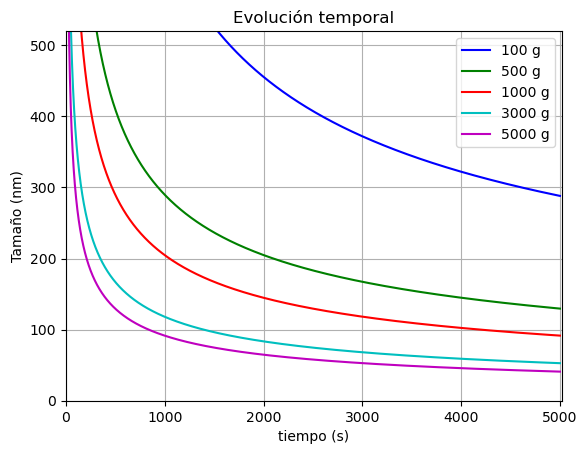

In [108]:
import numpy as np
import matplotlib.pyplot as plt


"""Dfinimos las variables que ocupará nuestro programa"""
rho_p = 19300       #Densidad de la partícula (kg/m^3)
rho_m = 997       #Densidad del medio  (kg/m^3)
nu = 1.002e-3         #Viscosidad del fluido/agua (kg/m s)
r_0 = 9.0           #Radio inicial  (cm)
r_p = 10.19

omega1 = 1030/60        #Velocidad angular (revs por seg)
omega2 = 2290/60
omega3 = 3240/60
omega4 = 5620/60
omega5 = 7250/60


def f(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_p/r_0)*nu)/(x*(rho_p-rho_m)*omega1**2))    
    return dp1/1e-9
def g(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_p/r_0)*nu)/(x*(rho_p-rho_m)*omega2**2))    
    return dp1/1e-9
def h(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_p/r_0)*nu)/(x*(rho_p-rho_m)*omega3**2))    
    return dp1/1e-9
def i(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_p/r_0)*nu)/(x*(rho_p-rho_m)*omega4**2))    
    return dp1/1e-9
def j(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_p/r_0)*nu)/(x*(rho_p-rho_m)*omega5**2))    
    return dp1/1e-9




#Limites y puntos
x = np.linspace(2,5000,10000)
v = [0,5020,0,520]

#Graficar
plt.plot(x,f(x),'b', label = '100 g')
plt.plot(x,g(x),'g', label = '500 g')
plt.plot(x,h(x),'r', label = '1000 g')
plt.plot(x,i(x),'c', label = '3000 g')
plt.plot(x,j(x),'m', label = '5000 g')


plt.xlabel('tiempo (s)')
plt.ylabel('Tamaño (nm)')
plt.title("Evolución temporal")
plt.grid()
plt.legend(loc=1)

"""plt.text(9, 250, 'Sobrenadante')
plt.text(9.6, 350, 'Residual')
plt.text(10.55,500, 'Pellet')"""

plt.axis()
plt.axis(v)
"""plt.axvspan(9.0, 9.52, alpha=0.3, color='b')
plt.axvspan(9.52, 10.19, alpha=0.3, color='g')
plt.axvspan(10.19, 11.36, alpha=0.3, color='c')"""


Probemos ahora una evolución angular a un tiempo constante

"plt.axvspan(9.0, 9.52, alpha=0.3, color='b')\nplt.axvspan(9.52, 10.19, alpha=0.3, color='g')\nplt.axvspan(10.19, 11.36, alpha=0.3, color='c')"

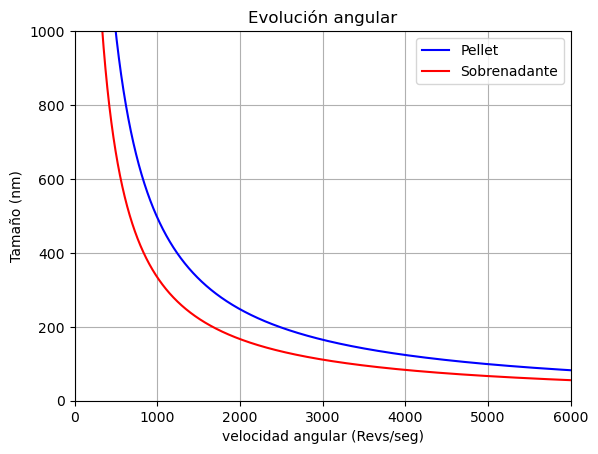

In [104]:
import numpy as np
import matplotlib.pyplot as plt


"""Dfinimos las variables que ocupará nuestro programa"""
rho_p = 19300       #Densidad de la partícula (kg/m^3)
rho_m = 997       #Densidad del medio  (kg/m^3)
nu = 1.002e-3         #Viscosidad del fluido/agua (kg/m s)
r_0 = 9.0           #Radio inicial  (cm)
r_p = 10.19
r_s = 9.522

t=1800        #Velocidad angular (revs por seg)


def f(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_p/r_0)*nu)/(t*(rho_p-rho_m)*(x/60)**2))    
    return dp1/1e-9
def g(x):       #Definimos la funcion de centrifuagación
    dp1 = np.sqrt((18*np.log(r_s/r_0)*nu)/(t*(rho_p-rho_m)*(x/60)**2))    
    return dp1/1e-9



#Limites y puntos
x = np.linspace(2,6000,10000)
v = [0,6000,0,1000]

#Graficar
plt.plot(x,f(x),'b', label = 'Pellet')
plt.plot(x,g(x),'r', label = 'Sobrenadante')

plt.xlabel('velocidad angular (Revs/seg)')
plt.ylabel('Tamaño (nm)')
plt.title("Evolución angular")
plt.grid()
plt.legend(loc=1)

"""plt.text(9, 250, 'Sobrenadante')
plt.text(9.6, 350, 'Residual')
plt.text(10.55,500, 'Pellet')"""

plt.axis()
plt.axis(v)
"""plt.axvspan(9.0, 9.52, alpha=0.3, color='b')
plt.axvspan(9.52, 10.19, alpha=0.3, color='g')
plt.axvspan(10.19, 11.36, alpha=0.3, color='c')"""
